<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

In Lab 4.1.1 we were able to predict house price via a predictor variable from first principles. Here we the see how the same can be done using scikit-learn.

For comparison purposes, we will continue with the same predictor `sq__ft` in our dataset as last time.

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Read in the data

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df = pd.read_csv(house_csv)
print(df.head())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  


In [3]:
# Perform EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [4]:
# Get summary stats for price, sqft and beds
df[["price", "sq__ft", "beds"]].describe()

price       sq__ft        beds
count     985.000000   985.000000  985.000000
mean   234144.263959  1314.916751    2.911675
std    138365.839085   853.048243    1.307932
min      1551.000000     0.000000    0.000000
25%    145000.000000   952.000000    2.000000
50%    213750.000000  1304.000000    3.000000
75%    300000.000000  1718.000000    4.000000
max    884790.000000  5822.000000    8.000000

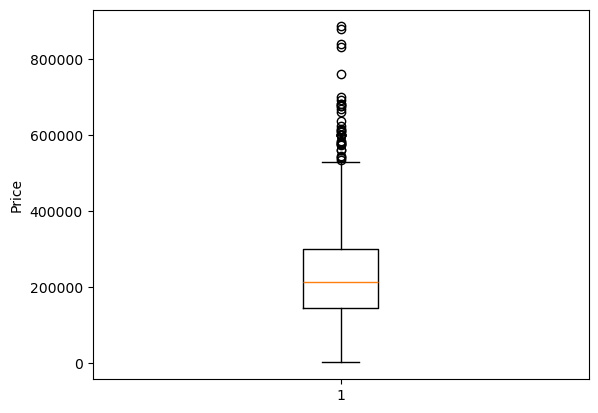

In [5]:
plt.boxplot(df["price"])
plt.ylabel ("Price")
plt.show()

In [6]:
# What if we exclude the outliers?
# Find quantiles
Q1= df["price"].quantile(0.25)
Q3= df["price"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

145000.0 300000.0 155000.0


In [7]:
# Find boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-87500.0 532500.0


In [8]:
# Find outliers

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print (outliers)

                      street             city    zip state  beds  baths  \
152        2217 APPALOOSA CT           FOLSOM  95630    CA     4      2   
153       868 HILDEBRAND CIR           FOLSOM  95630    CA     0      0   
154         6030 PALERMO WAY  EL DORADO HILLS  95762    CA     4      3   
155          4070 REDONDO DR  EL DORADO HILLS  95762    CA     4      3   
156          4004 CRESTA WAY       SACRAMENTO  95864    CA     3      3   
157             315 JUMEL CT  EL DORADO HILLS  95762    CA     6      5   
326           2733 DANA LOOP  EL DORADO HILLS  95762    CA     0      0   
327       9741 SADDLEBRED CT           WILTON  95693    CA     0      0   
328       7756 TIGERWOODS DR       SACRAMENTO  95829    CA     5      3   
329       5709 RIVER OAK WAY       CARMICHAEL  95608    CA     4      2   
330          2981 WRINGER DR        ROSEVILLE  95661    CA     4      3   
331        8616 ROCKPORTE CT        ROSEVILLE  95747    CA     4      2   
332             4128 HILL

In [9]:
print(len(outliers))
print(outliers[["price"]].describe())

37
               price
count      37.000000
mean   639797.000000
std     92827.870021
min    533000.000000
25%    579093.000000
50%    606238.000000
75%    677048.000000
max    884790.000000


In [10]:
# Define 'no_outliers'
no_outliers = df[~(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(len(no_outliers))
print(no_outliers[["price"]].describe())

985
               price
count     985.000000
mean   234144.263959
std    138365.839085
min      1551.000000
25%    145000.000000
50%    213750.000000
75%    300000.000000
max    884790.000000


In [11]:
no_outliers[["price","sq__ft", "beds"]].describe()

price       sq__ft        beds
count     985.000000   985.000000  985.000000
mean   234144.263959  1314.916751    2.911675
std    138365.839085   853.048243    1.307932
min      1551.000000     0.000000    0.000000
25%    145000.000000   952.000000    2.000000
50%    213750.000000  1304.000000    3.000000
75%    300000.000000  1718.000000    4.000000
max    884790.000000  5822.000000    8.000000

In [12]:
# Clean the data by removing the "outlier" data

outlier_ids = outliers["street"]
df_clean = df[~df["street"].isin(outlier_ids)]
print(df_clean)

                  street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   pr

In [13]:
df_clean[["price","sq__ft", "beds"]].describe()

price       sq__ft        beds
count     948.000000   948.000000  948.000000
mean   218311.825949  1298.780591    2.887131
std    113513.702472   807.168251    1.283032
min      1551.000000     0.000000    0.000000
25%    140000.000000   960.000000    2.000000
50%    208000.000000  1302.000000    3.000000
75%    289000.000000  1692.000000    4.000000
max    528000.000000  5822.000000    8.000000

In [14]:
# By removing the high outliers, mean price has come down (as expected)

In [15]:
# What are the unique values amd their counts for each categorical feature (e.g., city, type)
print(df["city"].value_counts())

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: count, dtype: int64


In [16]:
print(df["type"].value_counts())

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='city'>

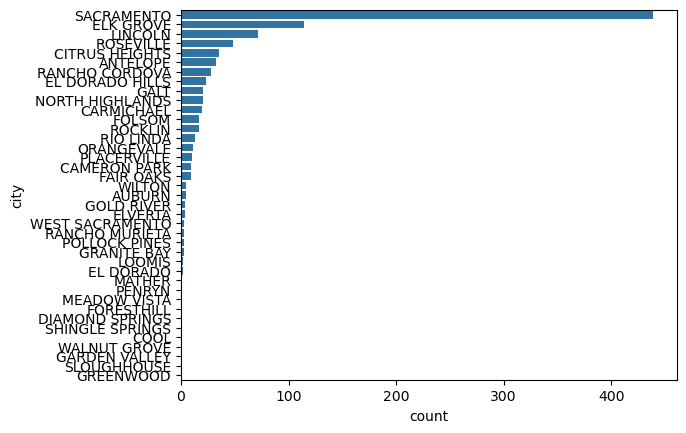

In [17]:
sns.countplot(y="city", data=df, order=df["city"].value_counts().index)

<Axes: xlabel='count', ylabel='type'>

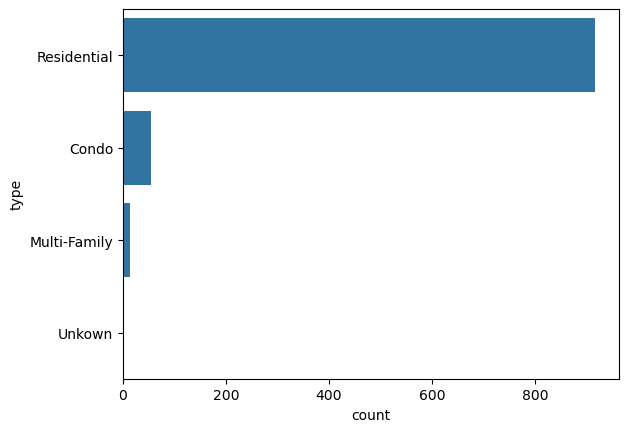

In [18]:
sns.countplot(y="type", data=df, order=df["type"].value_counts().index)

### 2. Predict Price

We are going to predict the target variable `price` from `sq__ft` using sklearn's linear_model.

Read up on the following methods and attributes here: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- coef_
- intercept_
- fit()
- predict()
- score()

In [19]:
#coef: The magnitude of each coefficient indicates the strength\
    #of the relationship between the corresponding feature and the target variable.
#intercept:provides access to the intercept term (bias) of linear models.
#fit(): The primary purpose of fit() is to train the model by adjusting its parameters (coefficients, weights, biases, etc.) to minimize the |
    #difference between predicted outputs and actual target values in the training data.
#predict():to use a trained machine learning model to predict the outcome (dependent variable) for new,\
    #unseen data points based on their features (independent variables).
#score(): determines model accuracy between 0 and 1.  used to evaluate the performance \
    #of a trained machine learning model on a given dataset.

In [21]:
# import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

#### 2.1 Create an instance of LinearRegression.

In [22]:
# ANSWER
model = LinearRegression()

#### 2.2 Fit predictor and target variables using linear regression

In [23]:
X = df['sq__ft'].values.reshape(-1,1)  # Changes it to a 2D array as this is requred by model.fit()
y = df['price']

In [24]:
# ANSWER
model.fit(X,y)

LinearRegression()

#### 2.3. Using attributes of the LinearRegression() class find coefficient and intercept.

In [25]:
# ANSWER
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [54.15863969]
Intercept: 162930.16140699777


#### 2.4 Find R^2 Score

Find $R^2$ Using the ```score``` method of LinearRegression.

In [26]:
# ANSWER
# r2_score = model.score(X_test, y_test)

r2_score = model.score(X,y)
print("R-squared(score method):", r2_score)

R-squared(score method): 0.11148717682951437


### 3. Splitting Data


Splitting the data into training and test sets is important in supervised learning.

- We ensure that the test set remains untouched during the model training process. This isolation prevents any information leakage about the test set into the training process.

- It allows us to evaluate the performance of our machine learning model on unseen data.


In [27]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Use the `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [28]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [29]:
# ANSWER
## Check training/test data
# Check shape
print("Shape of X-train:", X_train.shape)
print("Shape of X-test:", X_test.shape)
print("Shape of y-train:", y_train.shape)
print("Shape of y-test:", y_test.shape)

Shape of X-train: (659, 1)
Shape of X-test: (326, 1)
Shape of y-train: (659,)
Shape of y-test: (326,)


In [30]:
# Check sample
print("Sample of X_train:", X_train[:3])
print("Sample of X_test:", X_test[:3])
print("Sample of y_train:", y_train[:3])
print("Sample of y_test:", y_test[:3])

Sample of X_train: [[1758]
 [1643]
 [2354]]
Sample of X_test: [[ 906]
 [2382]
 [1962]]
Sample of y_train: 433    217500
172     99000
125    335750
Name: price, dtype: int64
Sample of y_test: 613     77000
451    236000
731    240971
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [31]:
# ANSWER
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# ANSWER
score = model.score(X_test, y_test)
print(score)

0.13602012247180006


In [33]:
############################################################################################################

In [34]:
# Do the same as above but using two features i.e. beds & sqft

In [35]:
# Create a new instance of Linear Regression
model_2 = LinearRegression()

In [36]:
# Fit predictor and target variables
X_2 = df[["sq__ft", "beds"]].values   # No need to use change shape as already multi-dimensional
y_2 = df["price"]
print(X_2[:3])

[[ 836    2]
 [1167    3]
 [ 796    2]]


In [37]:
# Fit model
model_2.fit(X_2, y_2)

LinearRegression()

In [38]:
print("Coefficient:", model_2.coef_)
print("Intercept:", model_2.intercept_)

Coefficient: [   30.46522993 22590.89940988]
Intercept: 128307.6628826202


In [39]:
# r2_score = model.score(X_test, y_test)

r2_score = model_2.score(X_2, y_2)
print("R-squared:", r2_score)

R-squared: 0.13575119373153988


In [40]:
# Split data

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
print(X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape)

(659, 2) (326, 2) (659,) (326,)


In [41]:
# Fit model
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [42]:
# Find score
score_2 = model_2.score(X_2_test, y_2_test)
print(score_2)

0.14706805098582454


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using the linear regression model.**

In [43]:
# ANSWER
# Predict prices from X_test using original model
y_pred = model.predict(X_test)
print(y_pred [:5])

[209458.52761247 279472.71169224 259549.97638499 248971.95263852
 238915.71481676]


In [44]:
print(y_pred.shape)
print(X_test.shape)

(326,)
(326, 1)


In [45]:
# To predict price for the above house
y_pred_m1 = model.predict([[1204]])  # Reshape the input into a 2D array
print(y_pred_m1)

[223594.18266381]


In [46]:
# Predict price from X_test using second model i.e. 2 features
y_pred_m2 = model_2.predict(X_2_test) 
print(y_pred_m2[:5])

[196324.86350871 303493.48111147 244832.98183231 264347.60837475
 234972.02098414]


In [47]:
# To predict price for the above house using the 2-features model
y_pred_val2 = model_2.predict([[1204,3]])
print(y_pred_val2)

[227649.97419343]


In [48]:
# Check the above by substituting into the linear regression model
p_y = model_2.intercept_ + model_2.coef_[0]*1204+model_2.coef_[1]*3
print(p_y)

227649.97419343382


#### Find the error

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print(y_test.shape)
print(y_pred.shape)

(326,)
(326,)


In [51]:
# Find the error using original model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 18951801967.76203
Root Mean Squared Error: 137665.54386542056


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
print(y_2_test.shape)
print(y_pred_m2.shape)

(326,)
(326,)


In [53]:
# Find the error using second model i.e. two features
mse2 = mean_squared_error(y_2_test, y_pred_m2)
print("Mean Squared Error:", mse2)
rmse2 = mean_squared_error(y_2_test, y_pred_m2, squared=False)
print("Root Mean Squared Error:", rmse2)

Mean Squared Error: 18709460498.0153
Root Mean Squared Error: 136782.52994449


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
"""
Use MSE: When large errors are particularly undesirable, such as in healthcare predictions where misdiagnosis can have severe implications.

Use RMSE: When you need an error metric that is in the same units as the predicted variable, making it easier to interpret,\
such as in weather forecasting.

Use MAE: When you need a straightforward average error that is less sensitive to outliers,such as in budget forecasting \
for a company where you need a reliable and interpretable error metric.

Use R-squared: When you want to assess how well your model explains the variability of the dependent variable,\
such as in evaluating the effectiveness of marketing campaigns.
"""

'\nUse MSE: When large errors are particularly undesirable, such as in healthcare predictions where misdiagnosis can have severe implications.\n\nUse RMSE: When you need an error metric that is in the same units as the predicted variable, making it easier to interpret,such as in weather forecasting.\n\nUse MAE: When you need a straightforward average error that is less sensitive to outliers,such as in budget forecasting for a company where you need a reliable and interpretable error metric.\n\nUse R-squared: When you want to assess how well your model explains the variability of the dependent variable,such as in evaluating the effectiveness of marketing campaigns.\n'

### Conclusion
We have seen that through scikit-learn, minimal code is needed to implement and evaluate a linear regression model.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



